In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from numpy import linalg as LA

import os

os.chdir("E:/EBAC/Material/M27 - K-means")

df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [14]:
# dropear variedad para solo evaluar solo los dos primeros componentes
df_data = df.drop(columns=['variety', 'petal.width', 'petal.length'])

In [3]:
# Determinar el número de renglones de la base de datos
index = df_data.index
renglones = len(index)
print('Numero de renglones: ', renglones)

Numero de renglones:  150


In [4]:
# Estandarización de las variables
df_scaled = StandardScaler().fit_transform(df_data)
df_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

In [5]:
# Calcular la matriz de correlaciones para la matriz transformada
A = (1/renglones)*np.dot(df_scaled.T, df_scaled)
A

array([[ 1.        , -0.11756978],
       [-0.11756978,  1.        ]])

In [6]:
# Entrenamiento del modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_data)


# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

print("Eigenvalores: ")
results = LA.eigvals(A)
print(results)

Eigenvalores: 
[1.11756978 0.88243022]


In [7]:
# Porcentaje de la varianza explicada por cada nuevo componente
print("Porcentaje de varianza explicada por componente")
print(modelo_pca.explained_variance_ratio_)

Porcentaje de varianza explicada por componente
[0.55878489 0.44121511]


In [8]:
# Cálculo de eigenvectores
print("Eigenvectores (por renglón):")
pd.DataFrame(data = modelo_pca.components_,
             columns = df_data.columns,
             index = ['PC1', 'PC2'])

Eigenvectores (por renglón):


,sepal.length,sepal.width
PC1,0.707107,-0.707107
PC2,0.707107,0.707107


In [9]:
# Proyecciones de los componentes
proyecciones = np.dot(modelo_pca.components_, df_scaled.T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2'])
proyecciones = proyecciones.transpose().set_index(df_data.index)
proyecciones

,PC1,PC2
0,-1.357423,0.083667
1,-0.714911,-0.901559
2,-1.211816,-0.747368
3,-1.134721,-0.995821
4,-1.605875,0.160762
...,...,...
145,0.827304,0.640657
146,1.298458,-0.515926
147,0.655947,0.469299
148,-0.252184,0.863358


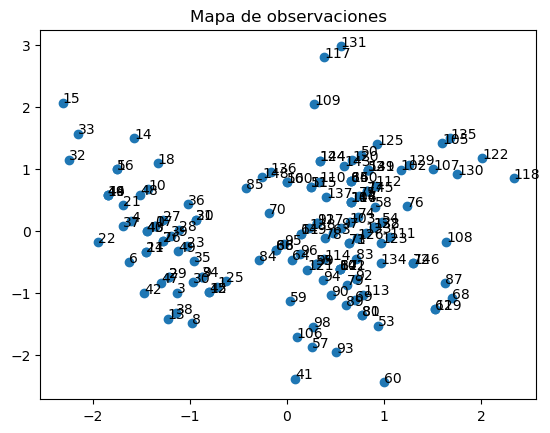

In [10]:
x = proyecciones.iloc[:,0]
y = proyecciones.iloc[:,1]
z = df_data.index
x = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title("Mapa de observaciones")
ax.scatter(x,y)

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))

In [11]:
componentes_2 = pd.DataFrame(data = modelo_pca.components_,
                             columns = df_data.columns,
                             index = ['PC1', 'PC2'])
componentes_2 = componentes_2.iloc[0:2, :]
componentes_2 = componentes_2.T
componentes_2

,PC1,PC2
sepal.length,0.707107,0.707107
sepal.width,-0.707107,0.707107


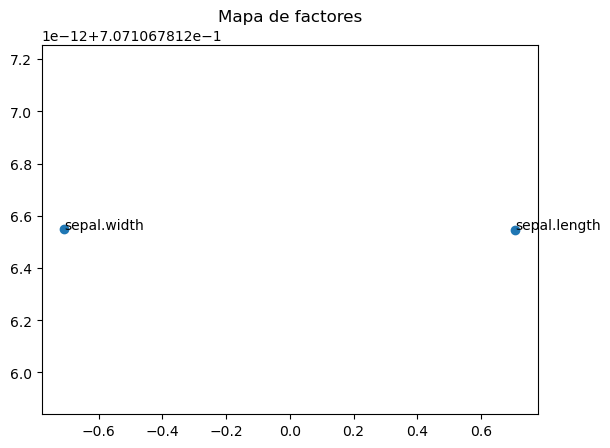

In [12]:
x = componentes_2.iloc[:,0]
y = componentes_2.iloc[:,1]
z = componentes_2.index
x = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title("Mapa de factores")
ax.scatter(x,y)

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))

In [13]:
# Procedimiento para obtener la matriz estandarizada original
original = np.dot(modelo_pca.components_.T, proyecciones.T)
original = original.T
print(original)

[[-0.90068117  1.01900435]
 [-1.14301691 -0.13197948]
 [-1.38535265  0.32841405]
 [-1.50652052  0.09821729]
 [-1.02184904  1.24920112]
 [-0.53717756  1.93979142]
 [-1.50652052  0.78880759]
 [-1.02184904  0.78880759]
 [-1.74885626 -0.36217625]
 [-1.14301691  0.09821729]
 [-0.53717756  1.47939788]
 [-1.26418478  0.78880759]
 [-1.26418478 -0.13197948]
 [-1.87002413 -0.13197948]
 [-0.05250608  2.16998818]
 [-0.17367395  3.09077525]
 [-0.53717756  1.93979142]
 [-0.90068117  1.01900435]
 [-0.17367395  1.70959465]
 [-0.90068117  1.70959465]
 [-0.53717756  0.78880759]
 [-0.90068117  1.47939788]
 [-1.50652052  1.24920112]
 [-0.90068117  0.55861082]
 [-1.26418478  0.78880759]
 [-1.02184904 -0.13197948]
 [-1.02184904  0.78880759]
 [-0.7795133   1.01900435]
 [-0.7795133   0.78880759]
 [-1.38535265  0.32841405]
 [-1.26418478  0.09821729]
 [-0.53717756  0.78880759]
 [-0.7795133   2.40018495]
 [-0.41600969  2.63038172]
 [-1.14301691  0.09821729]
 [-1.02184904  0.32841405]
 [-0.41600969  1.01900435]
 